## `Dataset 10`

Nama Dataset : Employee Career Advancement Prediction Data

Goals : Identifying the most influential factors in promotion decisions and building a classification prediction model using supervised learning to predict which employees are eligible for promotion.

About Dataset : The company faces challenges in determining which employees are eligible for promotion. Traditionally, promotion decisions have often been subjective, relying heavily on manual evaluations by managers. This approach can lead to bias, lack of transparency, and the potential loss of high-performing employees. By leveraging historical employee data, the company can build a classification model to predict promotion eligibility based on factors such as performance, experience, leadership, and participation in training or projects.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r'Rakamin Bootcamp - Dataset - Promotion Dataset.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Employee_ID             1000 non-null   object 
 1   Age                     950 non-null    float64
 2   Years_at_Company        951 non-null    float64
 3   Performance_Score       950 non-null    float64
 4   Leadership_Score        950 non-null    float64
 5   Training_Hours          950 non-null    float64
 6   Projects_Handled        950 non-null    float64
 7   Peer_Review_Score       950 non-null    float64
 8   Current_Position_Level  950 non-null    object 
 9   Promotion_Eligible      950 non-null    float64
dtypes: float64(8), object(2)
memory usage: 78.3+ KB


In [7]:
df.head()

,Employee_ID,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible
0,EMP0001,24.0,21.0,2.0,44.0,42.0,19.0,61.0,Junior,0.0
1,EMP0002,50.0,8.0,5.0,45.0,66.0,11.0,6.0,Junior,0.0
2,EMP0003,56.0,9.0,5.0,19.0,96.0,6.0,86.0,Lead,0.0
3,EMP0004,39.0,24.0,4.0,51.0,16.0,6.0,52.0,Senior,0.0
4,EMP0005,41.0,NaN,4.0,64.0,57.0,16.0,59.0,Junior,0.0



`Berikut list fitur :`
1. Employee_ID: Unique identifier for each employee.
2. Age: Age of the employee.
3. Years_at_Company: Number of years the employee has been with the company.
4. Performance_Score: Annual performance rating of the employee 
5. Leadership_Score: Rating of the employee's leadership skills 
6. Training_Hours: Total hours of training completed by the employee.
7. Projects_Handled: Number of projects the employee has managed or contributed to.
8. Peer_Review_Score: Average score from peer reviews
9. Current_Position_Level: Current job level of the employee (e.g., Junior, Mid, Senior).

Label Target :
10. Promotion_Eligible: Binary indicator (1 for eligible, 0 for not eligible).


Kolom,Deskripsi
- Employee_ID,ID unik untuk tiap karyawan
- Age,Usia karyawan (terdapat missing & anomali)
- Years_at_Company,Lama bekerja di perusahaan (tahun)
- Performance_Score,Skor performa tahunan (1–5)
- Leadership_Score,Skor kepemimpinan (0–100)
- Training_Hours,Jumlah jam pelatihan yang diikuti karyawan
- Projects_Handled,Jumlah proyek yang pernah ditangani
- Peer_Review_Score,Skor penilaian rekan kerja (0–100)
- Current_Position_Level,"Level jabatan saat ini (Junior, Mid, Senior, Lead)"
- Promotion_Eligible,"Label target: 1 = eligible dipromosikan, 0 = tidak eligible"

In [8]:
# Check for missing values
print(df.isnull().sum())

Employee_ID                0
Age                       50
Years_at_Company          49
Performance_Score         50
Leadership_Score          50
Training_Hours            50
Projects_Handled          50
Peer_Review_Score         50
Current_Position_Level    50
Promotion_Eligible        50
dtype: int64


In [9]:
# check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [10]:
# cek distribusi
df.describe()

,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible
count,950.000000,951.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,40.940000,14.968454,2.969474,50.117895,109.286316,10.016842,51.227368,0.294737
std,12.863864,9.319084,1.417977,28.668058,184.616517,5.666507,29.141002,0.456165
min,-3.000000,-5.000000,1.000000,0.000000,-50.000000,0.000000,0.000000,0.000000
25%,31.000000,7.000000,2.000000,25.000000,51.250000,5.000000,25.000000,0.000000
50%,41.000000,15.000000,3.000000,51.000000,102.500000,10.000000,51.000000,0.000000
75%,50.000000,23.000000,4.000000,75.000000,150.750000,15.000000,78.000000,1.000000
max,200.000000,100.000000,5.000000,99.000000,5000.000000,19.000000,99.000000,1.000000


In [ ]:
# bagi menjadi numerik dan kategorikal
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

In [12]:
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['Age', 'Years_at_Company', 'Performance_Score', 'Leadership_Score', 'Training_Hours', 'Projects_Handled', 'Peer_Review_Score', 'Promotion_Eligible']
Categorical Features: ['Employee_ID', 'Current_Position_Level']


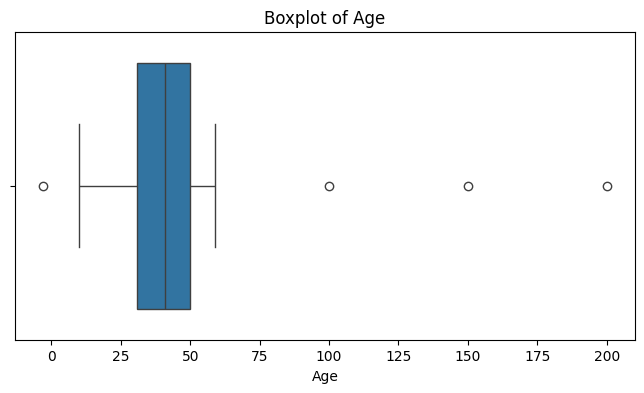

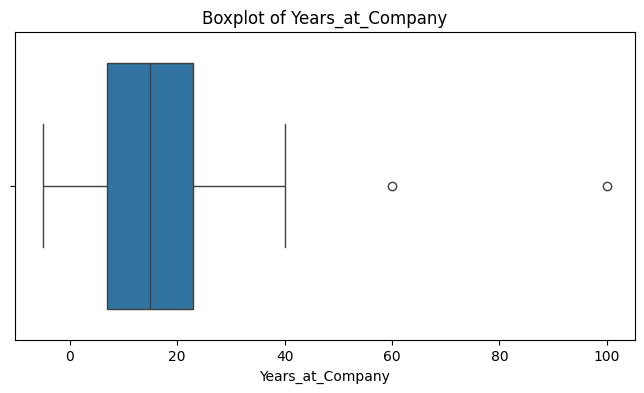

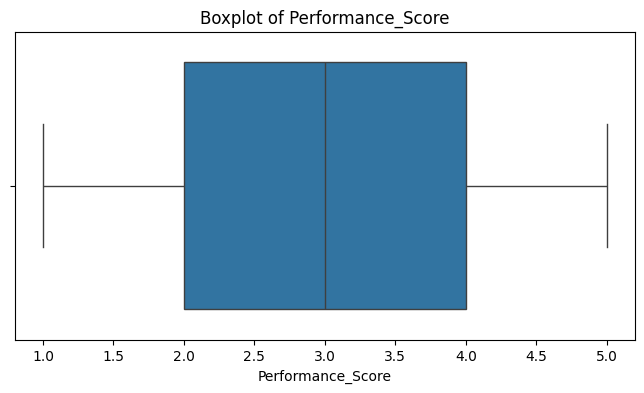

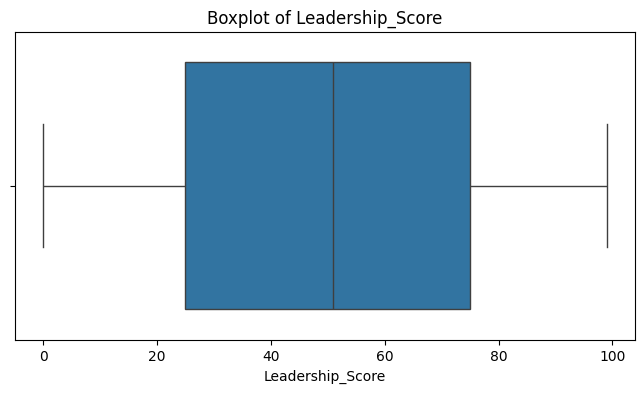

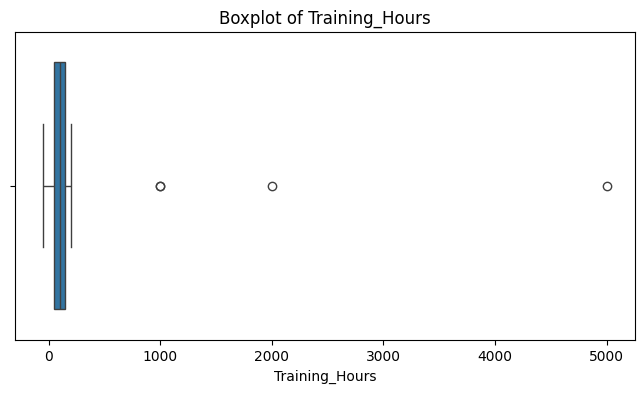

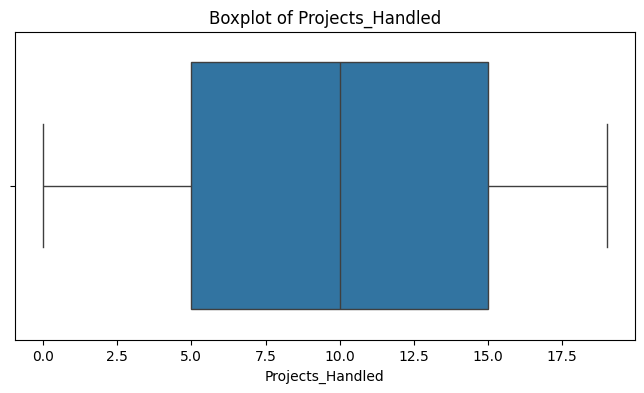

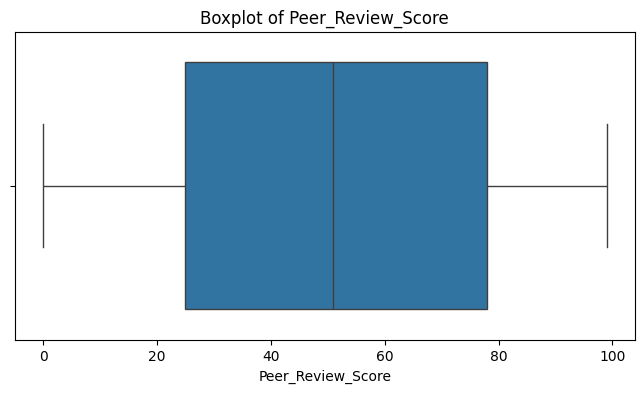

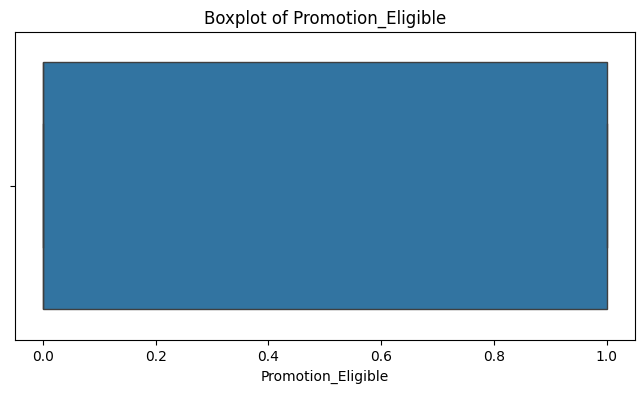

In [13]:
# boxplot untuk fitur numerik
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

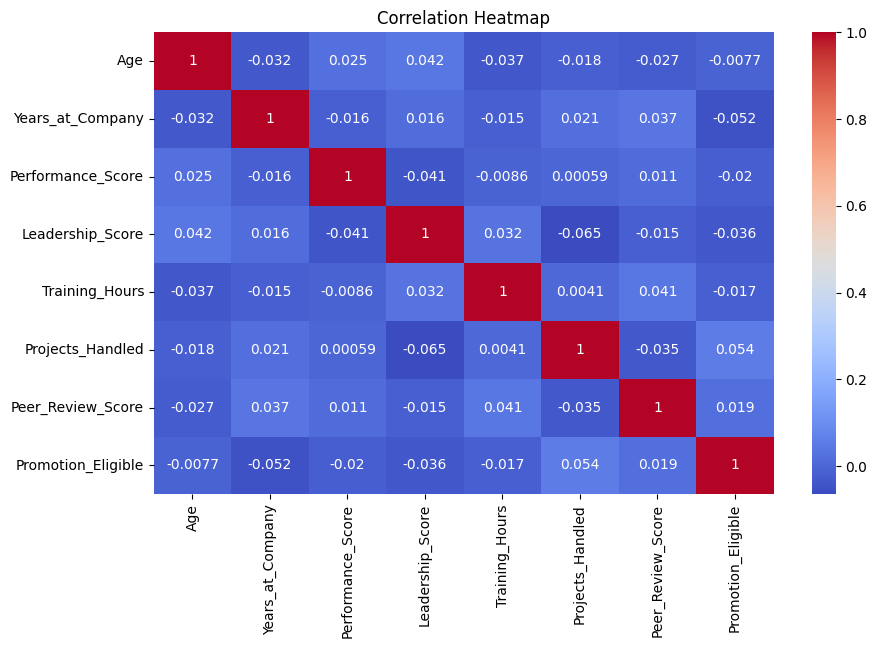

In [14]:
# heatmap untuk fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
df[categorical_features].head()

,Employee_ID,Current_Position_Level
0,EMP0001,Junior
1,EMP0002,Junior
2,EMP0003,Lead
3,EMP0004,Senior
4,EMP0005,Junior
